In [5]:
!pip install mlrose_hiive

In [6]:
import mlrose_hiive
import numpy as np
import pandas as pd
from google.colab import drive
np.random.seed(44)
drive.mount('/content/drive')

In [ ]:
rhc_run_stats = pd.read_pickle("/content/drive/My Drive/HW2/pickles/flipFlop_rhc_run_stats.pkl")
rhc_run_curves = pd.read_pickle("/content/drive/My Drive/HW2/pickles/flipFlop_rhc_run_curves.pkl")
sa_run_stats = pd.read_pickle("/content/drive/My Drive/HW2/pickles/flipFlop_sa_run_stats.pkl")
sa_run_curves = pd.read_pickle("/content/drive/My Drive/HW2/pickles/flipFlop_sa_run_curves.pkl")
ga_run_stats = pd.read_pickle("/content/drive/My Drive/HW2/pickles/flipFlop_ga_run_stats.pkl")
ga_run_curves = pd.read_pickle("/content/drive/My Drive/HW2/pickles/flipFlop_ga_run_curves.pkl")
mmc_run_stats = pd.read_pickle("/content/drive/My Drive/HW2/pickles/flipFlop_mmc_run_stats.pkl")
mmc_run_curves = pd.read_pickle("/content/drive/My Drive/HW2/pickles/flipFlop_mmc_run_curves.pkl")

# rhc_run_stats = pd.read_pickle("./pickles/flipFlop_rhc_run_stats.pkl")
# rhc_run_curves = pd.read_pickle("./pickles/flipFlop_rhc_run_curves.pkl")
# sa_run_stats = pd.read_pickle("./pickles/flipFlop_sa_run_stats.pkl")
# sa_run_curves = pd.read_pickle("./pickles/flipFlop_sa_run_curves.pkl")
# ga_run_stats = pd.read_pickle("./pickles/flipFlop_ga_run_stats.pkl")
# ga_run_curves = pd.read_pickle("./pickles/flipFlop_ga_run_curves.pkl")
# mmc_run_stats = pd.read_pickle("./pickles/flipFlop_mmc_run_stats.pkl")
# mmc_run_curves = pd.read_pickle("./pickles/flipFlop_mmc_run_curves.pkl")

## Define a Fitness Function

In [7]:
flip_len = 250
problem = mlrose_hiive.FlipFlopOpt(length=flip_len)

## Define an Optimization Problem Object
We use the fitness function as input into the optimization problem

__TSPOpt() descrive TSP optimization__

### Random Hill Climb

In [8]:
%%time
# DiscreteOpt() takes integers in range 0 to max_val-1
runner_return = mlrose_hiive.RHCRunner(problem, experiment_name="first_try", 
                                       iteration_list=[10000],
                                       seed=44, max_attempts=100, 
                                       restart_list=[100])
rhc_run_stats, rhc_run_curves = runner_return.run()

Running rhc
*****************
*** Run START ***
*****************
restarts:[100], max_iters:[10000], current_restart:[0]
runner_name:[rhc], experiment_name:[first_try], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[108.0000]
	[0 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 0// 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0// 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0...

restarts:[100], max_iters:[10000], current_restart:[0]
runner_name:[rhc], experiment_name:[first_try], attempt:[101], iteration:[608], done:[True], time:[0.44], fitness:[193.0000]
	[0 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0// 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0// 0 1 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1...

restarts:[100], max_iters:[10000], current_restart:[1]
runner_name:[rhc], experiment_name:[first_try], attempt:[0], iteration:[0], done:[False], time:[0.46], fitness

In [12]:
rhc_run_stats

,Iteration,Fitness,Time,State,Restarts,max_iters,current_restart
0,0,108.0,0.000788,"[0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, ...",100,10000,0
1,10000,193.0,0.444030,"[0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, ...",100,10000,0
2,0,118.0,0.461218,"[0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, ...",100,10000,1
3,10000,204.0,0.916918,"[0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, ...",100,10000,1
4,0,124.0,0.929607,"[0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, ...",100,10000,2
...,...,...,...,...,...,...,...
197,10000,203.0,167.977643,"[0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, ...",100,10000,98
198,0,119.0,168.071129,"[1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, ...",100,10000,99
199,10000,200.0,171.481979,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, ...",100,10000,99
200,0,121.0,171.576615,"[0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, ...",100,10000,100


In [13]:
rhc_run_curves

,Iteration,Time,Fitness,Restarts,max_iters,current_restart
0,0,0.000788,108.0,100,10000,0
1,1,0.004124,110.0,100,10000,0
2,2,0.005329,110.0,100,10000,0
3,3,0.005964,112.0,100,10000,0
4,4,0.007306,112.0,100,10000,0
...,...,...,...,...,...,...
54549,54549,174.293425,186.0,100,10000,100
54550,54550,174.301204,186.0,100,10000,100
54551,54551,174.310759,186.0,100,10000,100
54552,54552,174.316998,186.0,100,10000,100


In [14]:
best_index_in_curve = rhc_run_curves.Fitness.idxmax()
best_decay = rhc_run_curves.iloc[best_index_in_curve].current_restart
best_curve = rhc_run_curves.loc[rhc_run_curves.current_restart == best_decay, :]
best_curve.reset_index(inplace=True)
best_decay

22.0

Text(0, 0.5, 'Fitness Value')

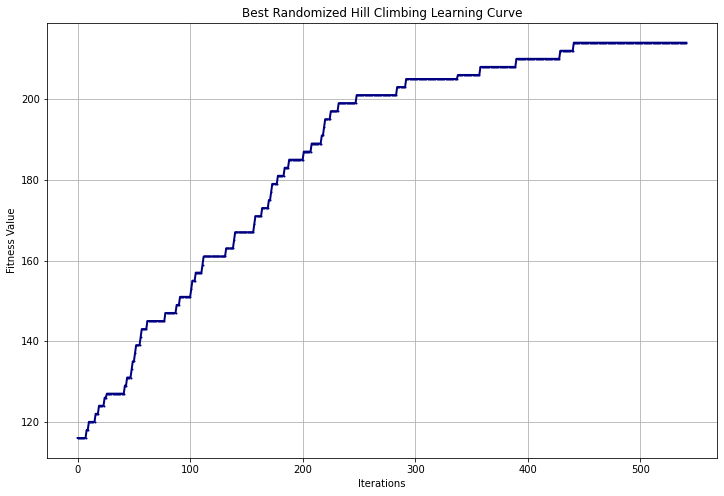

In [15]:
ax = best_curve.Fitness.plot(lw=2, colormap='jet', marker='.', markersize=2, 
                             figsize=(12,8), grid=1,
                             title='Best Randomized Hill Climbing Learning Curve')
ax.set_xlabel("Iterations")
ax.set_ylabel("Fitness Value")

In [16]:
last_iters = rhc_run_stats[rhc_run_stats.Iteration != 0].reset_index()
print(last_iters.Fitness.mean(), last_iters.Fitness.max())
print(last_iters.Time.max())

197.75247524752476 214.0
174.8748300920015


## Simulated Annealing

In [17]:
%%time
sa = mlrose_hiive.SARunner(problem, experiment_name="SA_Exp", 
                           iteration_list=[100000],
                           temperature_list=[1, 10, 50, 100, 250],
                           decay_list=[mlrose_hiive.ExpDecay,
                                       mlrose_hiive.GeomDecay],
                           seed=44, max_attempts=100)

sa_run_stats, sa_run_curves = sa.run()   

Running sa
*****************
*** Run START ***
*****************
schedule:[1], max_iters:[100000]
runner_name:[sa], experiment_name:[SA_Exp], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[108.0000]
	[0 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 0// 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0// 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0...

schedule:[1], max_iters:[100000]
runner_name:[sa], experiment_name:[SA_Exp], attempt:[101], iteration:[14203], done:[True], time:[18.79], fitness:[244.0000]
	[1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1// 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0// 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
schedule:[1], max_iters:[100000]
runner_name:[sa], experiment_name:[SA_Exp], attempt:[0], iteration:[0], done:[Fa

In [18]:
sa_run_stats

,Iteration,Fitness,Time,State,schedule_type,schedule_init_temp,schedule_exp_const,schedule_min_temp,schedule_current_value,Temperature,max_iters,schedule_decay
0,0,108.0,0.001227,"[0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, ...",exponential,1,0.005,0.001,0.999994,1,100000,NaN
1,100000,244.0,18.790132,"[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, ...",exponential,1,0.005,0.001,0.910328,1,100000,NaN
2,0,108.0,0.000773,"[0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, ...",geometric,1,NaN,0.001,0.999992,1,100000,0.99
3,100000,241.0,9.682152,"[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, ...",geometric,1,NaN,0.001,0.907276,1,100000,0.99
4,0,108.0,0.000753,"[0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, ...",exponential,10,0.005,0.001,9.999962,10,100000,NaN
5,100000,243.0,11.691109,"[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, ...",exponential,10,0.005,0.001,9.432202,10,100000,NaN
6,0,108.0,0.000790,"[0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, ...",geometric,10,NaN,0.001,9.999921,10,100000,0.99
7,100000,240.0,12.182715,"[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, ...",geometric,10,NaN,0.001,8.847587,10,100000,0.99
8,0,108.0,0.000776,"[0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, ...",exponential,50,0.005,0.001,49.999806,50,100000,NaN
9,100000,246.0,30.984275,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, ...",exponential,50,0.005,0.001,42.824126,50,100000,NaN


In [19]:
sa_run_curves

,Iteration,Time,Fitness,Temperature,max_iters
0,0,0.001227,108.0,1,100000
1,1,0.005119,108.0,1,100000
2,2,0.006447,106.0,1,100000
3,3,0.007722,108.0,1,100000
4,4,0.008973,108.0,1,100000
...,...,...,...,...,...
153884,153884,43.846217,242.0,250,100000
153885,153885,43.849006,242.0,250,100000
153886,153886,43.851668,242.0,250,100000
153887,153887,43.854365,242.0,250,100000


In [20]:
last_iters = sa_run_stats[sa_run_stats.Iteration != 0].reset_index()
print(last_iters.Fitness.mean(), last_iters.Fitness.max())
print(last_iters.Time.mean())

242.9 246.0
23.521666452800126


In [21]:
print(last_iters.loc[last_iters.schedule_init_temp == 1, "Time"].mean())
print(last_iters.loc[last_iters.schedule_init_temp == 10, "Time"].mean())
print(last_iters.loc[last_iters.schedule_init_temp == 50, "Time"].mean())
print(last_iters.loc[last_iters.schedule_init_temp == 100, "Time"].mean())
print(last_iters.loc[last_iters.schedule_init_temp == 250, "Time"].mean())
print(last_iters.loc[:, "Time"].mean())


14.236142119500073
11.93691172150011
26.766873397999916
22.167034951999995
42.501370073000544
23.521666452800126


In [22]:
best_index_in_curve = sa_run_curves.Fitness.idxmax()
best_decay = sa_run_curves.iloc[best_index_in_curve].Temperature
best_curve = sa_run_curves.loc[sa_run_curves.Temperature == best_decay, :]
best_curve.reset_index(inplace=True)
best_decay

ExpDecay(init_temp=50, exp_const=0.005, min_temp=0.001)

Text(0, 0.5, 'Fitness Value')

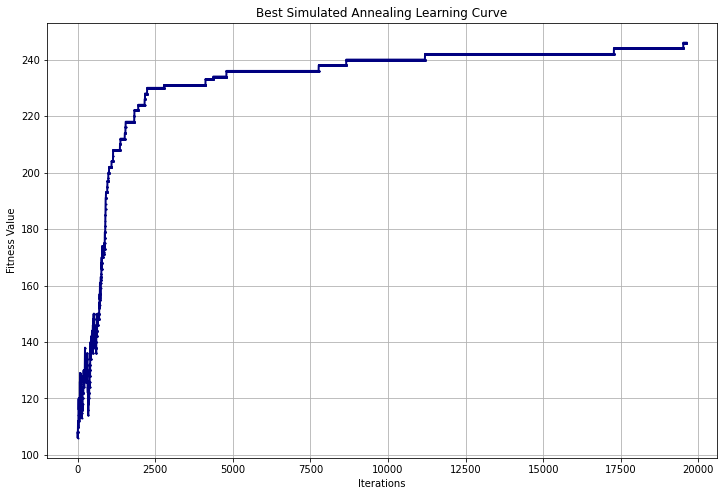

In [23]:
ax = best_curve.Fitness.plot(lw=2, colormap='jet', marker='.', markersize=2, 
                             figsize=(12,8), grid=1,
                             title='Best Simulated Annealing Learning Curve')
ax.set_xlabel("Iterations")
ax.set_ylabel("Fitness Value")

## Genetic Alg

In [24]:
%%time
ga = mlrose_hiive.GARunner(problem=problem,
                          experiment_name="GA_Exp",
                          seed=44,
                          iteration_list=[100000],
                          max_attempts=100,
                          population_sizes=[20,50,100],
                          mutation_rates=[0.1, 0.25, 0.5])
ga_run_stats, ga_run_curves = ga.run()   

Running ga
*****************
*** Run START ***
*****************
pop_size:[20], mutation_prob:[0.1], max_iters:[100000]
runner_name:[ga], experiment_name:[GA_Exp], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[108.0000]
	[0 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 0// 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0// 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0...

pop_size:[20], mutation_prob:[0.1], max_iters:[100000]
runner_name:[ga], experiment_name:[GA_Exp], attempt:[101], iteration:[705], done:[True], time:[1.76], fitness:[192.0000]
	[1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1.// 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0.// 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. ...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
pop_size:[20], mutation_prob:[0.25], max_iters:[100000]
runner_name:[ga]

In [25]:
ga_run_stats

,Iteration,Fitness,Time,State,Population Size,Mutation Rate,max_iters
0,0,108.0,0.002389,"[0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, ...",20,0.10,100000
1,100000,192.0,1.755436,"[1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, ...",20,0.10,100000
2,0,108.0,0.002019,"[0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, ...",20,0.25,100000
3,100000,209.0,1.395232,"[0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, ...",20,0.25,100000
4,0,108.0,0.001413,"[0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, ...",20,0.50,100000
5,100000,211.0,1.142665,"[0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...",20,0.50,100000
6,0,108.0,0.003480,"[0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, ...",50,0.10,100000
7,100000,207.0,2.557305,"[0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...",50,0.10,100000
8,0,108.0,0.001226,"[0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, ...",50,0.25,100000
9,100000,197.0,1.063235,"[0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...",50,0.25,100000


In [26]:
ga_run_curves

,Iteration,Time,Fitness,Population Size,Mutation Rate,max_iters
0,0,0.002389,140.0,20,0.1,100000
1,1,0.012143,140.0,20,0.1,100000
2,2,0.014759,143.0,20,0.1,100000
3,3,0.018439,143.0,20,0.1,100000
4,4,0.022499,143.0,20,0.1,100000
...,...,...,...,...,...,...
3468,3468,2.869724,222.0,100,0.5,100000
3469,3469,2.878875,222.0,100,0.5,100000
3470,3470,2.887695,222.0,100,0.5,100000
3471,3471,2.896643,222.0,100,0.5,100000


In [27]:
last_iters

,index,Iteration,Fitness,Time,State,schedule_type,schedule_init_temp,schedule_exp_const,schedule_min_temp,schedule_current_value,Temperature,max_iters,schedule_decay
0,1,100000,244.0,18.790132,"[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, ...",exponential,1,0.005,0.001,0.910328,1,100000,NaN
1,3,100000,241.0,9.682152,"[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, ...",geometric,1,NaN,0.001,0.907276,1,100000,0.99
2,5,100000,243.0,11.691109,"[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, ...",exponential,10,0.005,0.001,9.432202,10,100000,NaN
3,7,100000,240.0,12.182715,"[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, ...",geometric,10,NaN,0.001,8.847587,10,100000,0.99
4,9,100000,246.0,30.984275,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, ...",exponential,50,0.005,0.001,42.824126,50,100000,NaN
5,11,100000,242.0,22.549472,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, ...",geometric,50,NaN,0.001,39.860794,50,100000,0.99
6,13,100000,242.0,35.377593,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, ...",exponential,100,0.005,0.001,83.787365,100,100000,NaN
7,15,100000,244.0,8.956476,"[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, ...",geometric,100,NaN,0.001,91.391693,100,100000,0.99
8,17,100000,245.0,41.118798,"[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, ...",exponential,250,0.005,0.001,203.540892,250,100000,NaN
9,19,100000,242.0,43.883942,"[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, ...",geometric,250,NaN,0.001,160.840398,250,100000,0.99


In [28]:
best_index_in_curve = ga_run_curves.Fitness.idxmax()
best_decay = ga_run_curves.iloc[best_index_in_curve]['Mutation Rate']
best_curve = ga_run_curves.loc[ga_run_curves['Mutation Rate'] == best_decay, :]
best_curve.reset_index(inplace=True)
best_decay

0.5

Text(0, 0.5, 'Fitness Value')

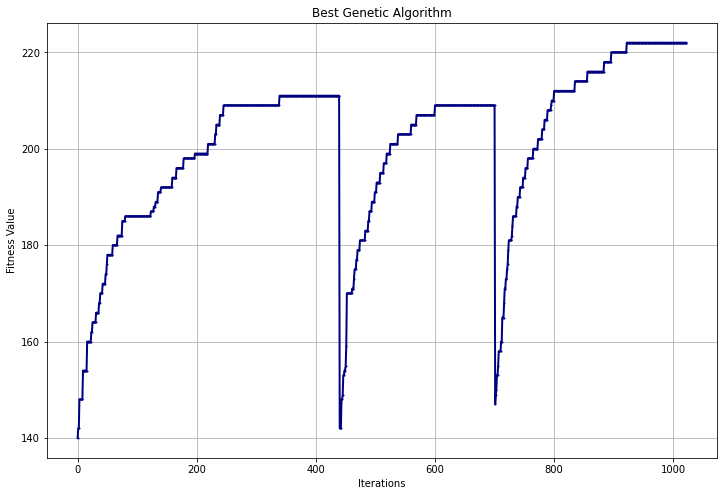

In [29]:
ax = best_curve.Fitness.plot(lw=2, colormap='jet', marker='.', markersize=2, 
                             figsize=(12,8), grid=1,
                             title='Best Genetic Algorithm')
ax.set_xlabel("Iterations")
ax.set_ylabel("Fitness Value")

In [30]:
last_iters = ga_run_stats[ga_run_stats.Iteration != 0].reset_index()
print("Max and mean")
print(last_iters.Fitness.max(), last_iters.Fitness.mean(), last_iters.Time.mean())
print(last_iters.groupby("Mutation Rate").Fitness.mean())
print(last_iters.groupby("Population Size").Fitness.mean())
print(last_iters.groupby("Population Size").Time.mean())

Max and mean
222.0 206.44444444444446 1.8395234373331024
Mutation Rate
0.10    201.666667
0.25    203.666667
0.50    214.000000
Name: Fitness, dtype: float64
Population Size
20     204.000000
50     204.333333
100    211.000000
Name: Fitness, dtype: float64
Population Size
20     1.431111
50     1.651666
100    2.435793
Name: Time, dtype: float64


## MIMIC

In [31]:
mmc = mlrose_hiive.MIMICRunner(problem=problem,
                          experiment_name="MMC_Exp",
                          seed=44,
                          iteration_list=[100000],
                          max_attempts=100,
                          population_sizes=[20,50,100],
                          keep_percent_list=[0.25, 0.5, 0.75],
                          use_fast_mimic=True)

# the two data frames will contain the results
mmc_run_stats, mmc_run_curves = mmc.run()

Running mimic
*****************
*** Run START ***
*****************
use_fast_mimic:[True], pop_size:[20], keep_pct:[0.25], max_iters:[100000]
runner_name:[mimic], experiment_name:[MMC_Exp], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[108.0000]
	[0 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 0// 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0// 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0...

use_fast_mimic:[True], pop_size:[20], keep_pct:[0.25], max_iters:[100000]
runner_name:[mimic], experiment_name:[MMC_Exp], attempt:[101], iteration:[101], done:[True], time:[8.84], fitness:[148.0000]
	[0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1.// 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0.// 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. ...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
use_fast_mimic:[True], 

In [32]:
mmc_run_stats

,Iteration,Fitness,Time,State,use_fast_mimic,Population Size,Keep Percent,max_iters
0,0,108.0,0.002514,"[0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, ...",True,20,0.25,100000
1,100000,148.0,8.836149,"[0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, ...",True,20,0.25,100000
2,0,108.0,0.001865,"[0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, ...",True,20,0.50,100000
3,100000,144.0,9.016910,"[0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, ...",True,20,0.50,100000
4,0,108.0,0.002214,"[0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, ...",True,20,0.75,100000
5,100000,150.0,10.795896,"[0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...",True,20,0.75,100000
6,0,108.0,0.002351,"[0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, ...",True,50,0.25,100000
7,100000,179.0,18.752747,"[0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, ...",True,50,0.25,100000
8,0,108.0,0.001163,"[0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, ...",True,50,0.50,100000
9,100000,175.0,17.916664,"[1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, ...",True,50,0.50,100000


In [33]:
mmc_run_curves

,Iteration,Time,Fitness,use_fast_mimic,Population Size,Keep Percent,max_iters
0,0,0.002514,148.0,True,20,0.25,100000
1,1,0.109081,148.0,True,20,0.25,100000
2,2,0.187917,148.0,True,20,0.25,100000
3,3,0.259800,148.0,True,20,0.25,100000
4,4,0.334921,148.0,True,20,0.25,100000
...,...,...,...,...,...,...,...
1314,1314,29.898631,197.0,True,100,0.75,100000
1315,1315,30.106616,197.0,True,100,0.75,100000
1316,1316,30.319530,197.0,True,100,0.75,100000
1317,1317,30.527022,197.0,True,100,0.75,100000


In [34]:
best_index_in_curve = mmc_run_stats.Fitness.idxmax()
best_decay = mmc_run_stats.iloc[best_index_in_curve]['Population Size']
best_curve = mmc_run_stats.loc[mmc_run_stats['Population Size'] == best_decay, :]
best_curve.reset_index(inplace=True)
best_decay

100

Text(0, 0.5, 'Fitness Value')

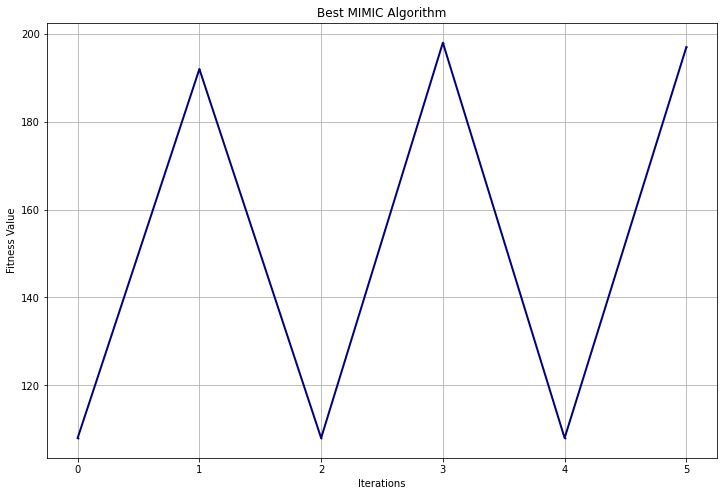

In [35]:
ax = best_curve.Fitness.plot(lw=2, colormap='jet', marker='.', markersize=2, 
                             figsize=(12,8), grid=1,
                             title='Best MIMIC Algorithm')
ax.set_xlabel("Iterations")
ax.set_ylabel("Fitness Value")

In [36]:
last_iters = mmc_run_stats[mmc_run_stats.Iteration != 0].reset_index()
print("Max and mean")
print(last_iters.Fitness.max(), last_iters.Fitness.mean(), last_iters.Time.mean())
print(last_iters.groupby("Keep Percent").Fitness.mean())
print(last_iters.groupby("Population Size").Fitness.mean())
print(last_iters.groupby("Population Size").Time.mean())

Max and mean
198.0 172.44444444444446 22.01346018000004
Keep Percent
0.25    173.000000
0.50    172.333333
0.75    172.000000
Name: Fitness, dtype: float64
Population Size
20     147.333333
50     174.333333
100    195.666667
Name: Fitness, dtype: float64
Population Size
20      9.549652
50     18.125508
100    38.365220
Name: Time, dtype: float64


In [ ]:
rhc_run_stats.to_pickle("./flipFlop_rhc_run_stats.pkl")
rhc_run_curves.to_pickle("./flipFlop_rhc_run_curves.pkl")
sa_run_stats.to_pickle("./flipFlop_sa_run_stats.pkl")
sa_run_curves.to_pickle("./flipFlop_sa_run_curves.pkl")
ga_run_stats.to_pickle("./flipFlop_ga_run_stats.pkl")
ga_run_curves.to_pickle("./flipFlop_ga_run_curves.pkl")
mmc_run_stats.to_pickle("./flipFlop_mmc_run_stats.pkl")
mmc_run_curves.to_pickle("./flipFlop_mmc_run_curves.pkl")
